<div style="display: flex;">
    <div style="flex: 1; padding: 10px; border:none;">
        <h1>Proyecto Final: <i>Análisis de Factores Determinantes del Desempeño Académico<i></h1>
        <h2>Estadística Multivariada</h2>
        <p>Tecnologías para la Información en Ciencias</p>
        <p>Roxana Pérez Medina - 424013174</p>
        <p>5 de enero de 2026 </p>
    </div>
    <div style="flex: 1; padding: 10px; border: none;">
        <img src="https://www.enesmorelia.unam.mx/wp-content/uploads/2023/04/Logo-UNAM-ENES-simple-color.jpg" alt="Logos UNAM y ENES Morelia" width="300" height="200">
    </div>
</div>

## 0. Cargar Datos

In [1]:
library(tidyverse)
library(ggplot2)
library(GGally)
library(corrplot)
library(lmtest)
library(sandwich)
library(factoextra)
library(FactoMineR)
library(cluster)


Warning message:
"package 'tidyverse' was built under R version 4.4.3"
Warning message:
"package 'ggplot2' was built under R version 4.4.3"
Warning message:
"package 'dplyr' was built under R version 4.4.3"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"package 'GGally' was built under R version 4.4.3"
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message:
"package 'corrplot' was built under R version 4.4.3"
corrplot 0.95 loaded

Warning message:
"package 'l

In [2]:
df = read.csv('Exam_Score_Prediction.csv')
head(df)

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
2,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
3,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
4,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
5,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
6,6,23,male,b.tech,3.48,65.4,yes,4.2,good,mixed,low,moderate,58.2


## 1. EDA

In [3]:
str(df)

'data.frame':	20000 obs. of  13 variables:
 $ student_id      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ age             : int  17 23 22 20 20 23 17 22 18 17 ...
 $ gender          : chr  "male" "other" "male" "other" ...
 $ course          : chr  "diploma" "bca" "b.sc" "diploma" ...
 $ study_hours     : num  2.78 3.37 7.88 0.67 0.89 3.48 1.35 5.48 2.89 6.77 ...
 $ class_attendance: num  92.9 64.8 76.8 48.4 71.6 65.4 69 51.1 92 44.8 ...
 $ internet_access : chr  "yes" "yes" "yes" "yes" ...
 $ sleep_hours     : num  7.4 4.6 8.5 5.8 9.8 4.2 7.4 8.2 6.6 9.8 ...
 $ sleep_quality   : chr  "poor" "average" "poor" "average" ...
 $ study_method    : chr  "coaching" "online videos" "coaching" "online videos" ...
 $ facility_rating : chr  "low" "medium" "high" "low" ...
 $ exam_difficulty : chr  "hard" "moderate" "moderate" "moderate" ...
 $ exam_score      : num  58.9 54.8 90.3 29.7 43.7 58.2 53.7 47.3 44.9 77.7 ...


Este dataset tiene 12 variables, 5 numéricas y 7 categóricas.

In [5]:
colSums(is.na(df))

student_id              age           gender           course 
               0                0                0                0 
     study_hours class_attendance  internet_access      sleep_hours 
               0                0                0                0 
   sleep_quality     study_method  facility_rating  exam_difficulty 
               0                0                0                0 
      exam_score 
               0

In [111]:
cualitativas = c('gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty')

In [7]:
cuantitativas = c('age', 'study_hours', 'class_attendance', 'sleep_hours', 'exam_score')


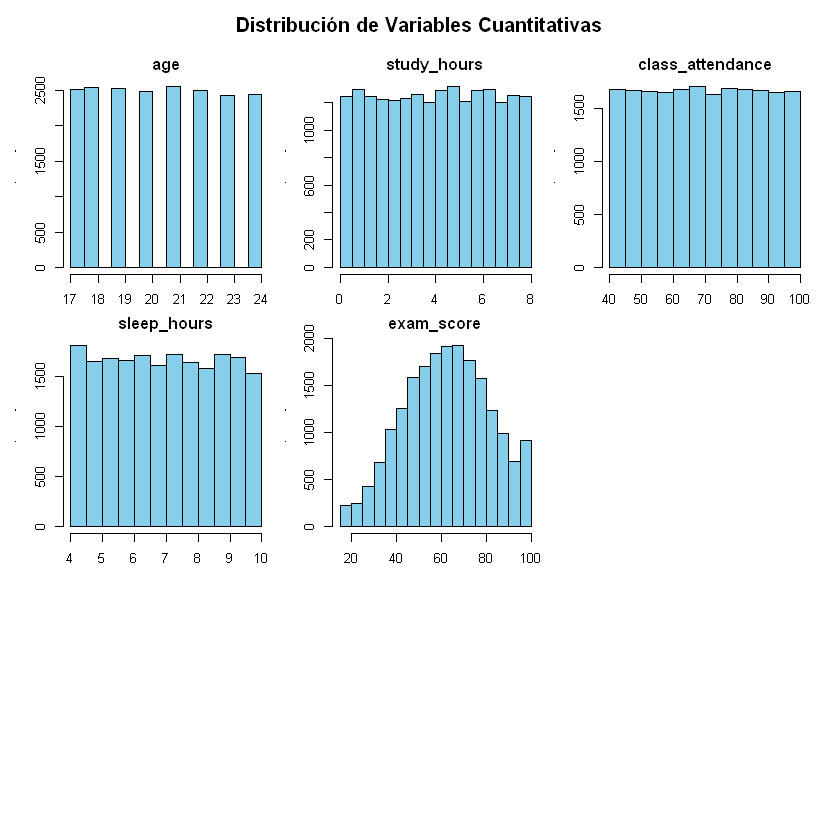

In [119]:
#png("images/histogramas.png", width = 1000, height = 800, res = 150)

par(mfrow = c(3, 3),
    oma = c(1, 1, 3, 1),
    mar = c(2, 3, 2, 1))

for(var in cuantitativas){
  hist(df[[var]], main = var, xlab = var, col = "skyblue")
}

title(main = "Distribución de Variables Cuantitativas",
      outer = TRUE,
      cex.main = 1.5,
      font.main = 2)

#dev.off()

La mayoría de las variables cuantitativas tienen ditribuciones uniformes. La variable `exam_score` tiene una distribución cercana a la normal.

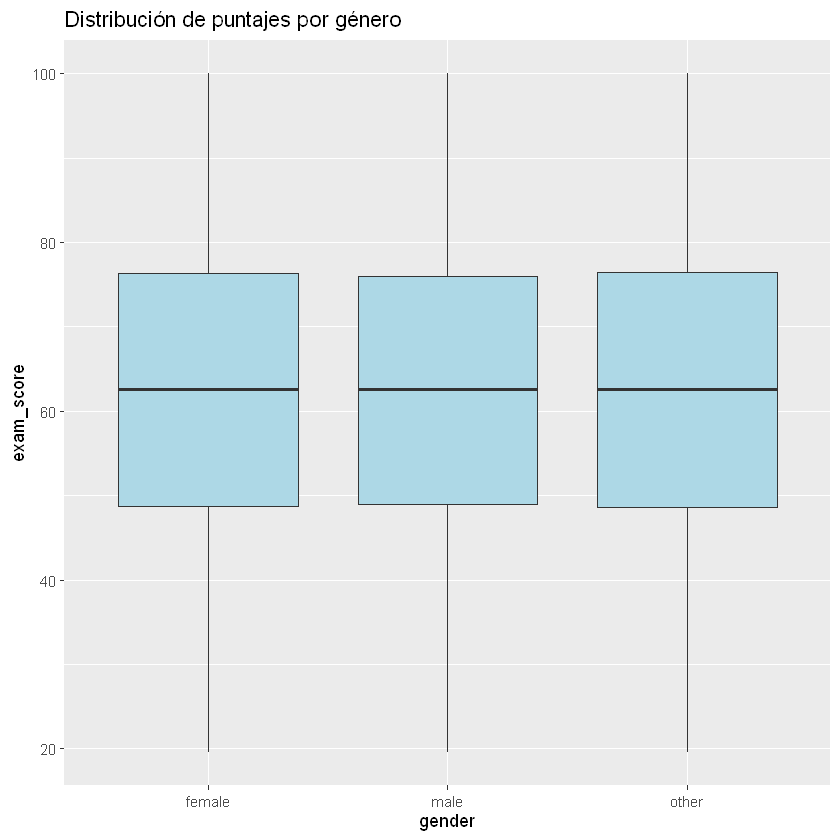

In [9]:
 |ggplot(df, aes(x=gender, y=exam_score)) +
  geom_boxplot(fill="lightblue") +
  labs(title="Distribución de puntajes por género")


No parece haber diferencia entre los puntajes dependiendo del género.

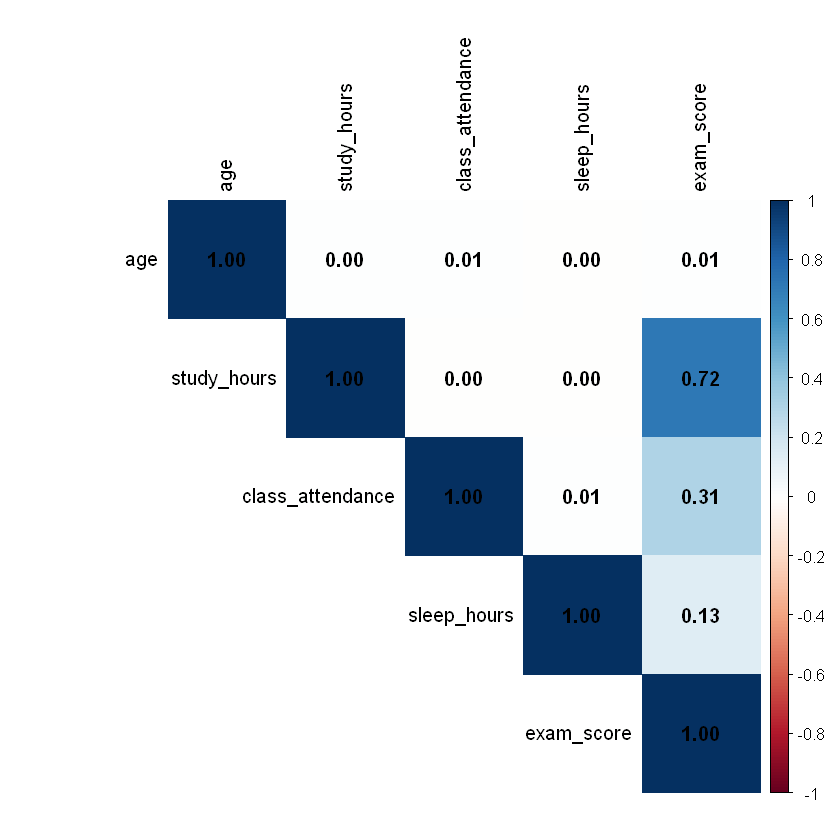

In [120]:
numericas = df %>%
  select(all_of(cuantitativas))

cor_matrix = cor(numericas, use="complete.obs")
corrplot(cor_matrix, method="color", type="upper",
         tl.col="black", addCoef.col="black")


`exam_score` tiene una correlación alta con `study_hours`, una correlación moderada con `class_attendance` y una correlación baja con `sleep hours`

`geom_smooth()` using formula = 'y ~ x'


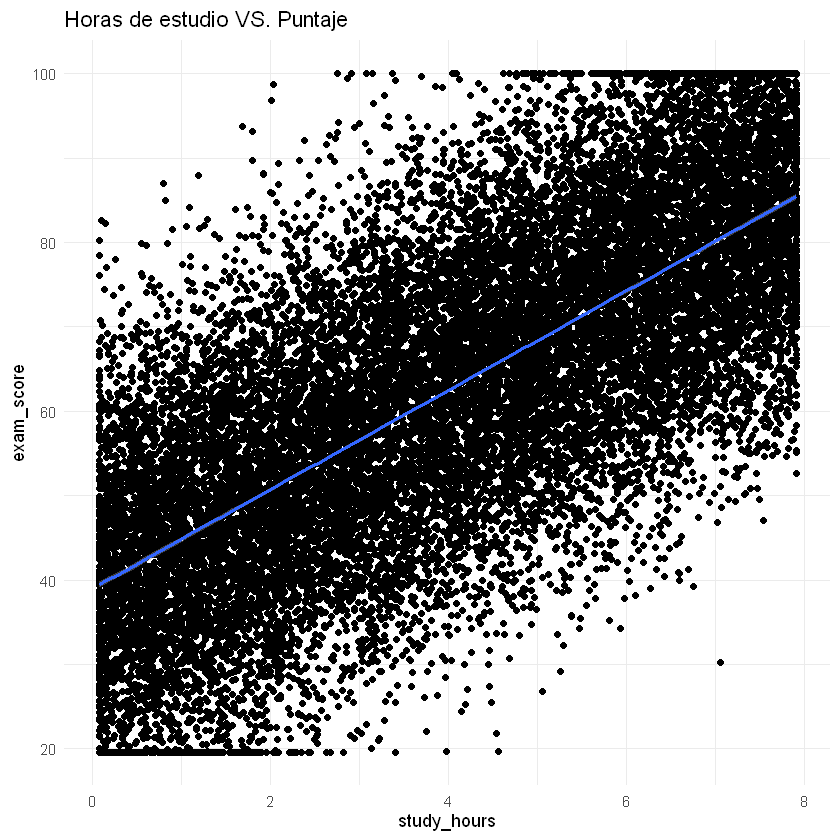

In [113]:
ggplot(df, aes(study_hours, exam_score)) +
  geom_point() +
  geom_smooth(method = "lm") +
  theme_minimal() +
  ggtitle('Horas de estudio VS. Puntaje')


Se observa una tendencia positiva, si se tienen más horas de estudio, la calificación promedio tiende a incrementar, con un poco de dispersión.

`geom_smooth()` using formula = 'y ~ x'


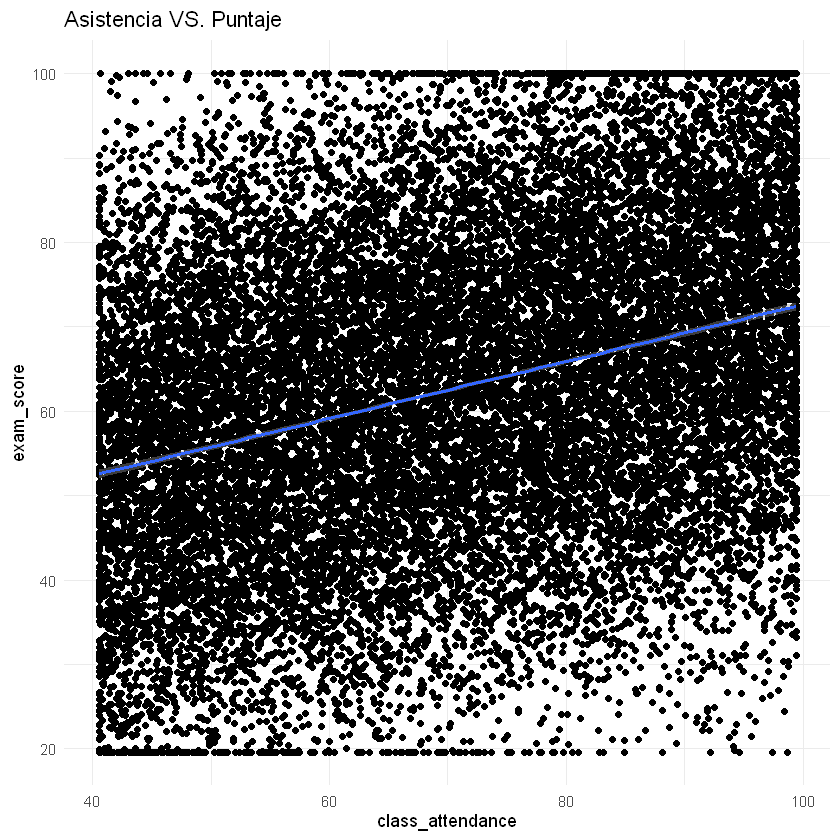

In [116]:
ggplot(df, aes(class_attendance, exam_score)) +
  geom_point() +
  geom_smooth(method = "lm") +
  theme_minimal() +
  ggtitle('Asistencia VS. Puntaje')


Se observa una tendencia positiva, si hay mayor porcentaje de asistencia, la calificación promedio tiende a incrementar, con una dispersión considerable.

`geom_smooth()` using formula = 'y ~ x'


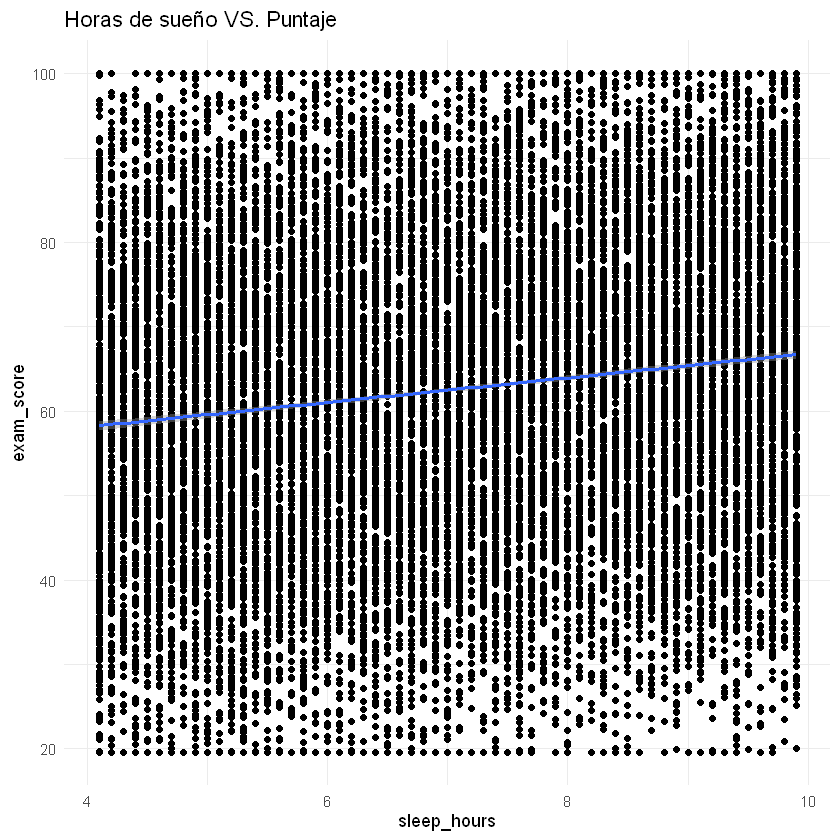

In [114]:
ggplot(df, aes(sleep_hours, exam_score)) +
  geom_point() +
  geom_smooth(method = "lm") +
  theme_minimal() +
  ggtitle('Horas de sueño VS. Puntaje')


`geom_smooth()` using formula = 'y ~ x'


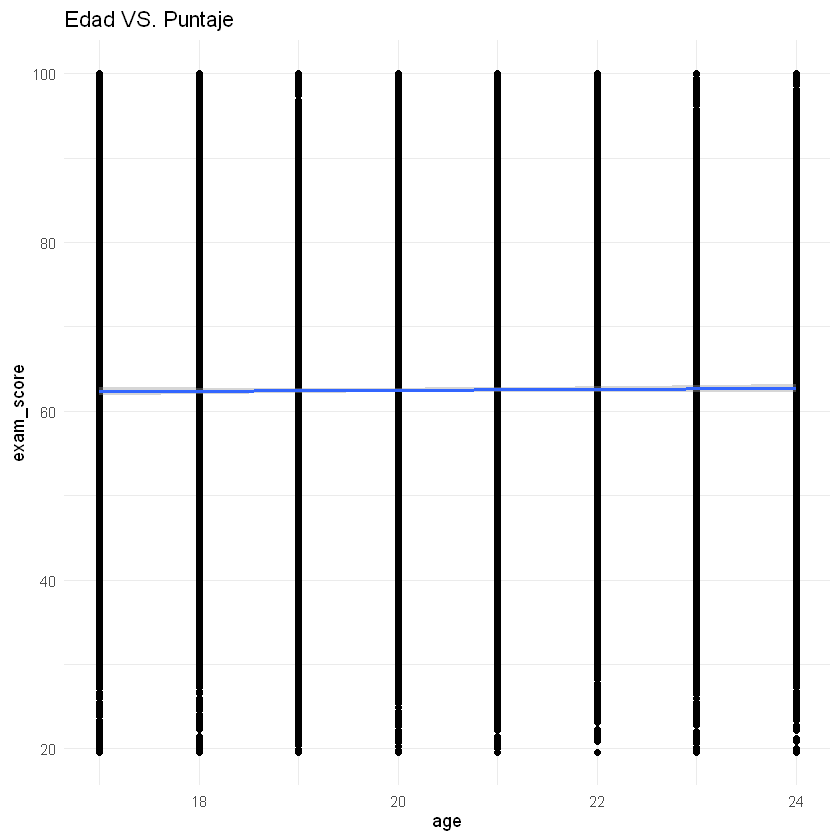

In [117]:
ggplot(df, aes(age, exam_score)) +
  geom_point() +
  geom_smooth(method = "lm") +
  theme_minimal() +
  ggtitle('Edad VS. Puntaje')


Tanto en la edad y las horas de sueño no se observa una relación clara con la calificación.

## 2. Regresión Lineal Múltiple

In [16]:
modelo_rlm = lm(exam_score ~ gender + course + sleep_hours + study_method + study_hours + class_attendance + sleep_quality + 
                 internet_access + facility_rating + exam_difficulty + age,
                 data = df)

In [17]:
summary(modelo_rlm)


Call:
lm(formula = exam_score ~ gender + course + sleep_hours + study_method + 
    study_hours + class_attendance + sleep_quality + internet_access + 
    facility_rating + exam_difficulty + age, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.176  -6.644   0.097   6.691  37.376 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               15.113972   0.819229  18.449   <2e-16 ***
gendermale                 0.081963   0.170079   0.482    0.630    
genderother                0.177948   0.169861   1.048    0.295    
courseb.sc                -0.181423   0.258515  -0.702    0.483    
courseb.tech               0.032088   0.260375   0.123    0.902    
courseba                   0.053079   0.258061   0.206    0.837    
coursebba                  0.080964   0.259440   0.312    0.755    
coursebca                  0.096910   0.257936   0.376    0.707    
coursediploma             -0.038715   0.259651  -0.149    0.881    
sl

### 2.1 Validación de Supuestos

#### 2.1.1 Multicolinealidad

In [18]:
variables = data.frame(df$study_hours, df$class_attendance, df$sleep_hours, df$age)
m_cor = cor(variables, method='pearson')
m_cor

,df.study_hours,df.class_attendance,df.sleep_hours,df.age
df.study_hours,1.000000000,-0.001644589,-0.0045326946,0.0029550204
df.class_attendance,-0.001644589,1.000000000,0.0071867453,0.0084486511
df.sleep_hours,-0.004532695,0.007186745,1.0000000000,-0.0003845256
df.age,0.002955020,0.008448651,-0.0003845256,1.0000000000


E

#### 2.1.2 Normalidad en los Residuales

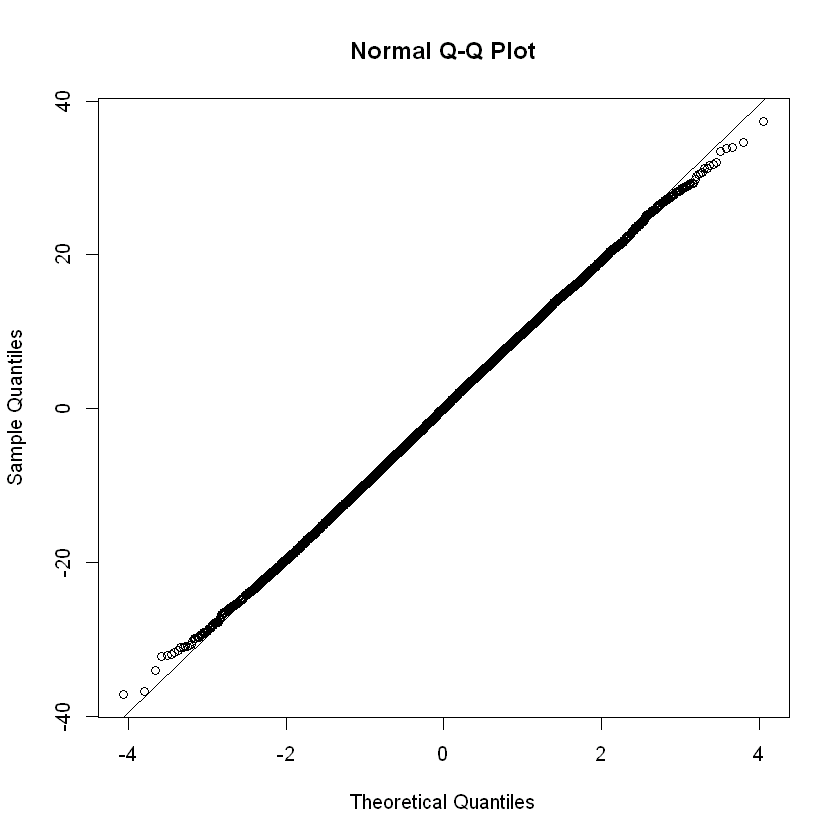

In [19]:
residuales = modelo_rlm$residuals

## Q-Q plot
qqnorm(residuales)
qqline(residuales)

#### 2.1.3 Homocedasticidad

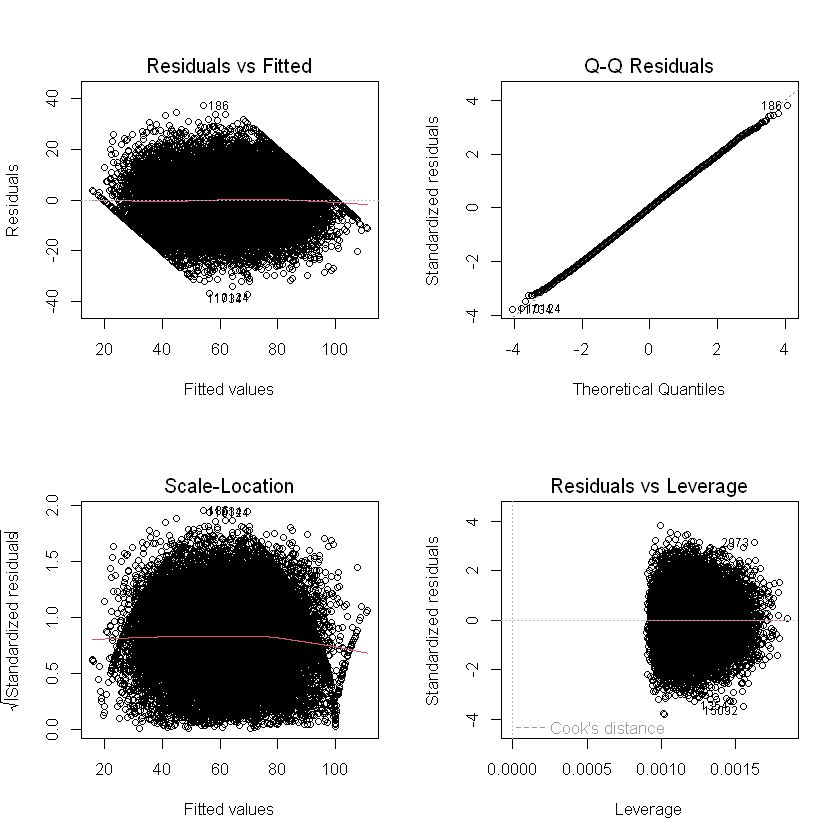

In [20]:
par(mfrow=c(2,2))
plot(modelo_rlm)

In [21]:
bptest(modelo_rlm)


	studentized Breusch-Pagan test

data:  modelo_rlm
BP = 32.29, df = 23, p-value = 0.09426


In [22]:
0.09 < 0.05

[1] FALSE

#### 2.1.4 No Autocorrelación

In [23]:
dwtest(modelo_rlm)


	Durbin-Watson test

data:  modelo_rlm
DW = 2.017, p-value = 0.8853
alternative hypothesis: true autocorrelation is greater than 0


### 2.2 Pruebas de Hipótesis

In [24]:
summary(modelo_rlm)


Call:
lm(formula = exam_score ~ gender + course + sleep_hours + study_method + 
    study_hours + class_attendance + sleep_quality + internet_access + 
    facility_rating + exam_difficulty + age, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.176  -6.644   0.097   6.691  37.376 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               15.113972   0.819229  18.449   <2e-16 ***
gendermale                 0.081963   0.170079   0.482    0.630    
genderother                0.177948   0.169861   1.048    0.295    
courseb.sc                -0.181423   0.258515  -0.702    0.483    
courseb.tech               0.032088   0.260375   0.123    0.902    
courseba                   0.053079   0.258061   0.206    0.837    
coursebba                  0.080964   0.259440   0.312    0.755    
coursebca                  0.096910   0.257936   0.376    0.707    
coursediploma             -0.038715   0.259651  -0.149    0.881    
sl

In [25]:
qf(1-0.05, 23, 19976)

[1] 1.52978

### 2.4 ANOVA

In [121]:
anova(modelo_rlm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
gender,2,1.363086e+02,6.815430e+01,7.111187e-01,4.911069e-01
course,6,1.327025e+03,2.211708e+02,2.307686e+00,3.144348e-02
sleep_hours,1,1.267829e+05,1.267829e+05,1.322847e+03,1.634117e-280
study_method,4,2.491870e+05,6.229674e+04,6.500012e+02,0.000000e+00
study_hours,1,3.678939e+06,3.678939e+06,3.838587e+04,0.000000e+00
class_attendance,1,6.837443e+05,6.837443e+05,7.134155e+03,0.000000e+00
sleep_quality,2,2.931242e+05,1.465621e+05,1.529222e+03,0.000000e+00
internet_access,1,1.070300e+01,1.070300e+01,1.116746e-01,7.382491e-01
facility_rating,2,2.024668e+05,1.012334e+05,1.056265e+03,0.000000e+00


### 2.5 Selección de Modelo

In [125]:
modelo_step <- step(
  modelo_rlm,
  direction = "both",
  trace = T
)

Start:  AIC=91277.79
exam_score ~ gender + course + sleep_hours + study_method + study_hours + 
    class_attendance + sleep_quality + internet_access + facility_rating + 
    exam_difficulty + age

                   Df Sum of Sq     RSS    AIC
- course            6       155 1914674  91267
- exam_difficulty   2        15 1914534  91274
- gender            2       105 1914625  91275
- age               1        11 1914530  91276
- internet_access   1        19 1914538  91276
<none>                          1914519  91278
- sleep_hours       1    125582 2040101  92546
- facility_rating   2    202489 2117009  93285
- study_method      4    242595 2157114  93656
- sleep_quality     2    293937 2208456  94130
- class_attendance  1    688049 2602568  97416
- study_hours       1   3700474 5614993 112795

Step:  AIC=91267.41
exam_score ~ gender + sleep_hours + study_method + study_hours + 
    class_attendance + sleep_quality + internet_access + facility_rating + 
    exam_difficulty + age



In [29]:
summary(modelo_step)


Call:
lm(formula = exam_score ~ sleep_hours + study_method + study_hours + 
    class_attendance + sleep_quality + facility_rating, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.205  -6.638   0.075   6.670  37.461 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               15.112242   0.461829   32.72   <2e-16 ***
sleep_hours                1.446783   0.039966   36.20   <2e-16 ***
study_methodgroup study   -7.696005   0.219482  -35.06   <2e-16 ***
study_methodmixed         -4.849712   0.219881  -22.06   <2e-16 ***
study_methodonline videos -8.825371   0.217450  -40.59   <2e-16 ***
study_methodself-study    -9.473642   0.217319  -43.59   <2e-16 ***
study_hours                5.896161   0.029992  196.59   <2e-16 ***
class_attendance           0.339524   0.004005   84.77   <2e-16 ***
sleep_qualitygood          4.586318   0.169671   27.03   <2e-16 ***
sleep_qualitypoor         -4.815546   0.169255  -28.45   <2e-16 ***

## 3. PCA 

In [71]:
cuant_df = df[, cuantitativas]
head(cuant_df)

,age,study_hours,class_attendance,sleep_hours,exam_score
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,17,2.78,92.9,7.4,58.9
2,23,3.37,64.8,4.6,54.8
3,22,7.88,76.8,8.5,90.3
4,20,0.67,48.4,5.8,29.7
5,20,0.89,71.6,9.8,43.7
6,23,3.48,65.4,4.2,58.2


In [127]:
df_escalado = scale(cuant_df)

In [37]:
pca_obj <- prcomp(cuant_df, scale. = TRUE)
eigenvalues <- pca_obj$sdev^2
eigenvalues

[1] 1.791988 1.010838 1.001437 0.989227 0.206510

In [129]:
pca_obj$rotation

,PC1,PC2,PC3,PC4,PC5
age,0.01109709,0.377636824,0.788563752,0.48521561,-0.0005496682
study_hours,0.63993816,-0.381817500,0.067079230,0.17278616,-0.6405777627
class_attendance,0.27573047,0.644591221,0.088314290,-0.65182151,-0.2753255708
sleep_hours,0.11783072,0.544152729,-0.604832944,0.55662633,-0.1198247377
exam_score,0.70742112,-0.002406533,-0.006729176,-0.00256929,0.7067515052


In [38]:
pca_obj

Standard deviations (1, .., p=5):
[1] 1.3386517 1.0054042 1.0007182 0.9945989 0.4544337

Rotation (n x k) = (5 x 5):
                        PC1          PC2          PC3         PC4           PC5
age              0.01109709  0.377636824  0.788563752  0.48521561 -0.0005496682
study_hours      0.63993816 -0.381817500  0.067079230  0.17278616 -0.6405777627
class_attendance 0.27573047  0.644591221  0.088314290 -0.65182151 -0.2753255708
sleep_hours      0.11783072  0.544152729 -0.604832944  0.55662633 -0.1198247377
exam_score       0.70742112 -0.002406533 -0.006729176 -0.00256929  0.7067515052

In [32]:
pca = PCA(df_escalado)
pca$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,1.791988,35.83977,35.83977
comp 2,1.010838,20.21675,56.05652
comp 3,1.001437,20.02874,76.08526
comp 4,0.989227,19.78454,95.86980
comp 5,0.206510,4.13020,100.00000


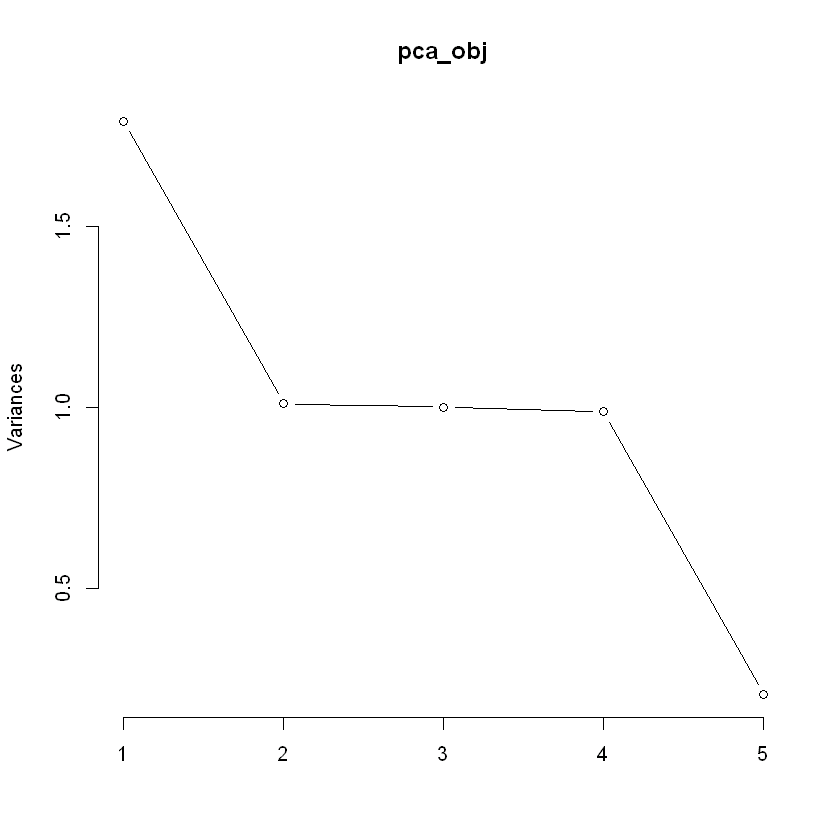

In [39]:
screeplot(pca_obj, type="lines")

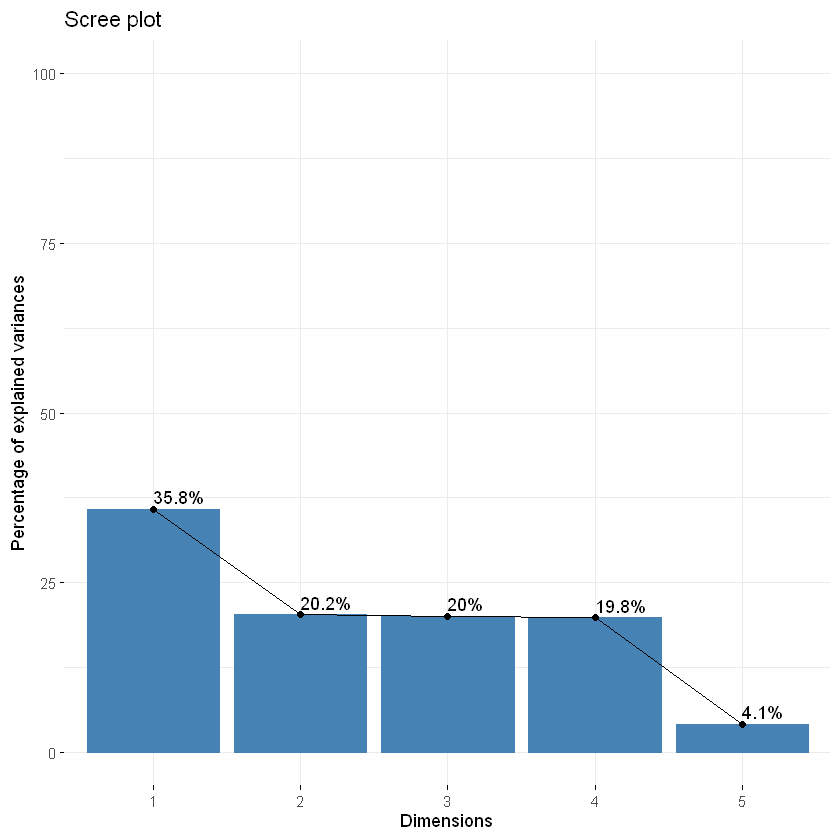

In [40]:
fviz_eig(pca_obj, addlabels = TRUE, ylim = c(0, 100))


In [41]:
componentes_kaiser <- which(eigenvalues > 1)
componentes_kaiser

[1] 1 2 3

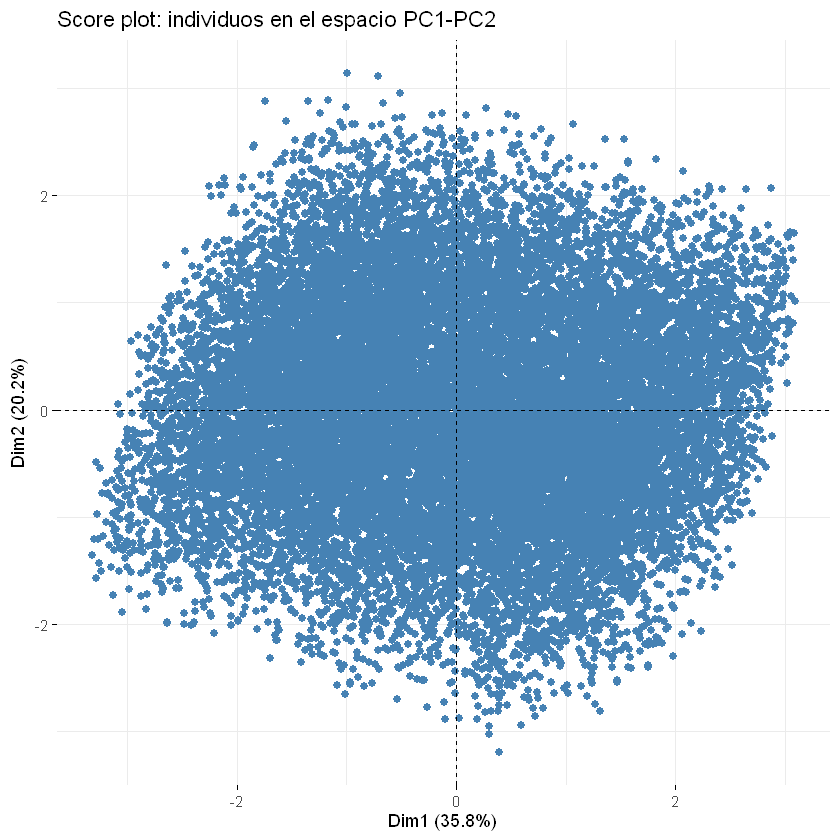

In [42]:
# Score plot PC1 vs PC2
fviz_pca_ind(pca_obj,
             geom = "point",
             pointsize = 2,
             col.ind = "steelblue",
             addEllipses = FALSE,
             title = "Score plot: individuos en el espacio PC1-PC2"
             )

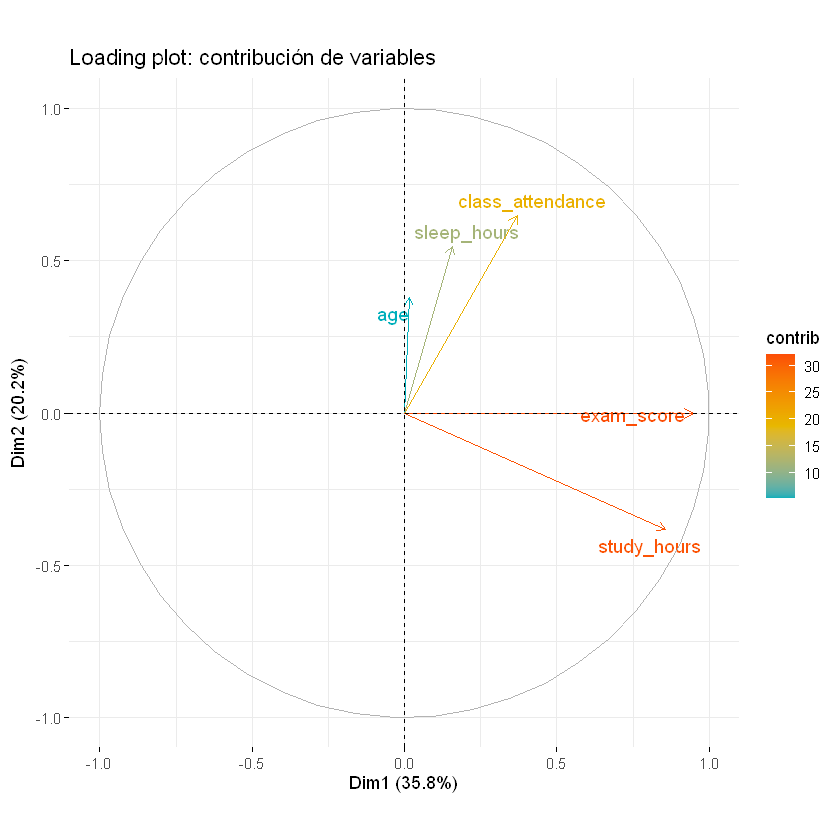

In [130]:
fviz_pca_var(pca_obj,
             col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE,
             title = "Loading plot: contribución de variables"
)

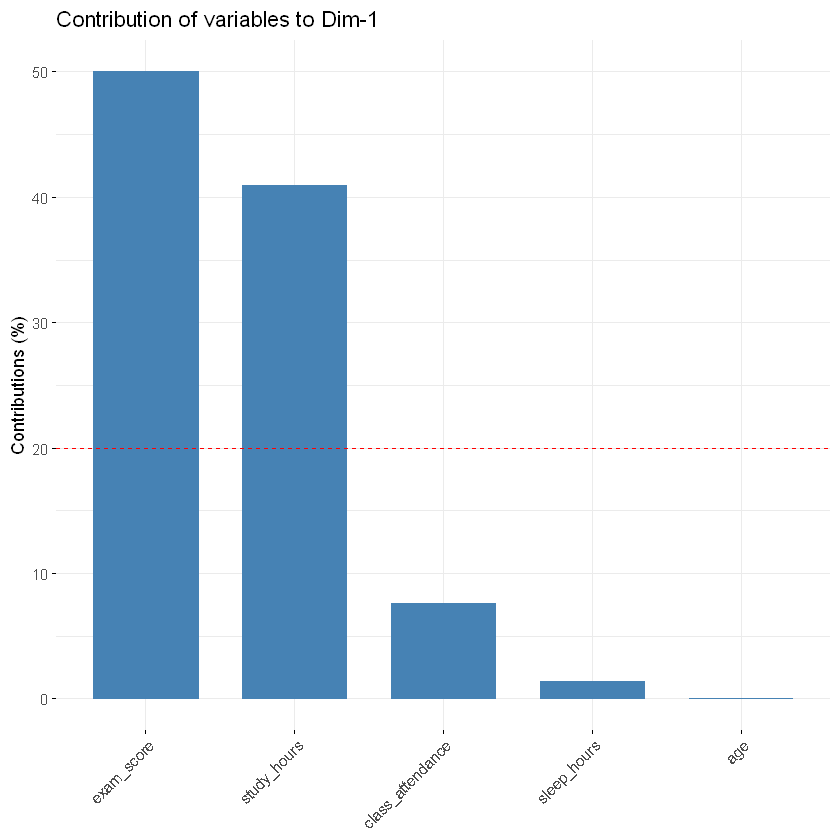

In [44]:
fviz_contrib(pca_obj, choice = "var", axes = 1)

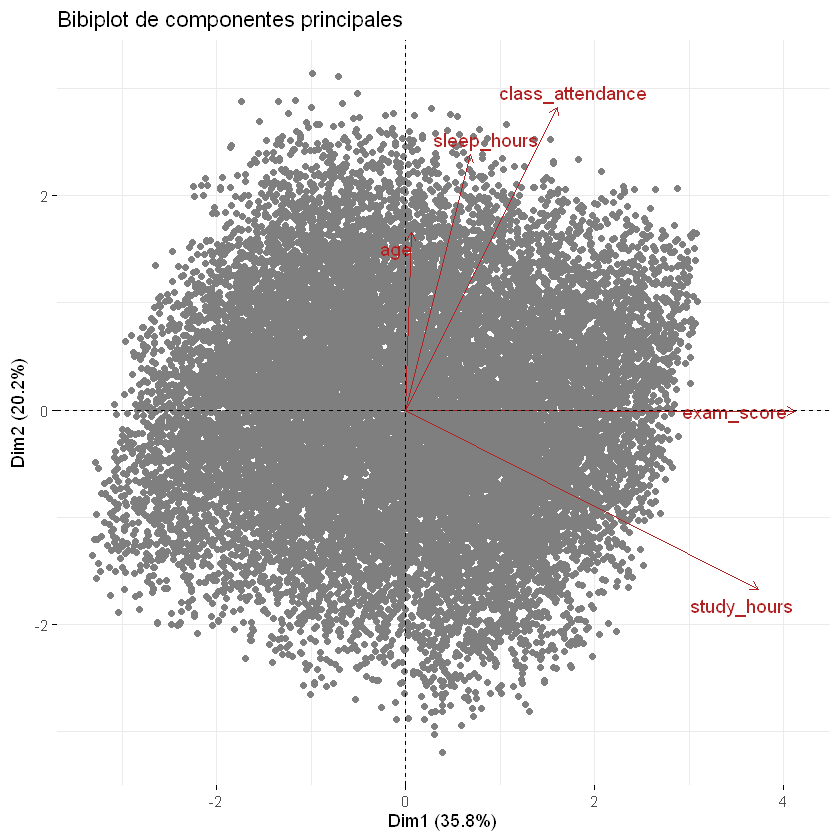

In [134]:
fviz_pca_biplot(pca_obj,
                repel = TRUE,
                col.ind = "gray50",
                col.var = "firebrick",
                geom.ind = "point",
                label = "var",
                title = "Bibiplot de componentes principales"
                )

## 4. Clustering

In [46]:
set.seed(36)

In [47]:
head(df_escalado)

age,study_hours,class_attendance,sleep_hours,exam_score
-1.5204044,-0.5318185,1.32405323,0.2259929,-0.1910901
1.1060392,-0.2762206,-0.30189132,-1.3905515,-0.4079239
0.6682986,1.6775873,0.39246222,0.8610640,1.4695395
-0.2071826,-1.4459060,-1.25084117,-0.6977468,-1.7353698
-0.2071826,-1.3505983,0.09157569,1.6116024,-0.9949617
1.1060392,-0.2285667,-0.26717365,-1.6214865,-0.2281105


In [136]:
dist_mat <- dist(df_escalado, method = "euclidean")

In [137]:
hc <- hclust(dist_mat, method = "complete")


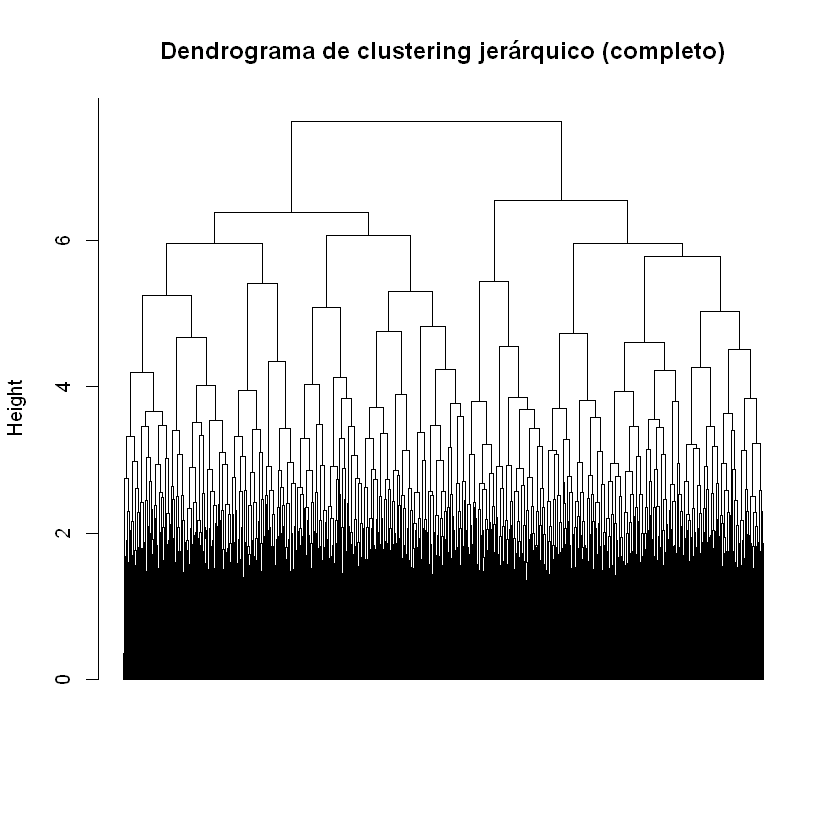

In [138]:
plot(
  hc,
  labels = FALSE,
  hang = -1,
  main = "Dendrograma de clustering jerárquico (completo)",
  xlab = "",
  sub = ""
)


In [55]:
wss <- sapply(1:8, function(k) {
  kmeans(df_escalado, centers = k, nstart = 5, iter.max = 20)$tot.withinss
})

Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1000000)"
Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1000000)"


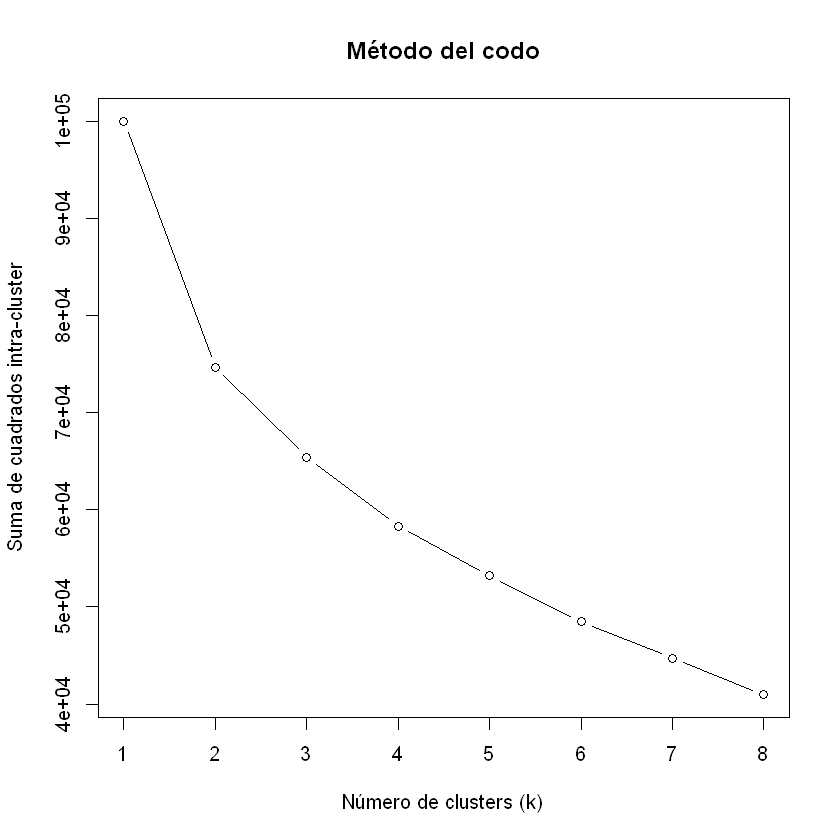

In [56]:
plot(1:8, wss, type = "b",
     xlab = "Número de clusters (k)",
     ylab = "Suma de cuadrados intra-cluster",
     main = "Método del codo")

In [72]:
set.seed(36)
kmeans_res <- kmeans(
  df_escalado,
  centers = 2,
  nstart = 25
)

df$cluster <- factor(kmeans_res$cluster)


In [74]:
head(df)

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score,cluster
,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>
1,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9,2
2,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8,2
3,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3,1
4,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7,2
5,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7,2
6,6,23,male,b.tech,3.48,65.4,yes,4.2,good,mixed,low,moderate,58.2,2


In [75]:
kmeans_res$centers


,age,study_hours,class_attendance,sleep_hours,exam_score
1,0.01054424,0.7818043,0.1817527,0.06905050,0.7621404
2,-0.01085452,-0.8048102,-0.1871010,-0.07108243,-0.7845677


In [76]:
centers_original <- aggregate(
  cuant_df,
  by = list(cluster = df$cluster),
  mean
)

centers_original


cluster,age,study_hours,class_attendance,sleep_hours,exam_score
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20.49739,5.812252,73.15846,7.128162,76.92415
2,20.44850,2.149850,66.78384,6.885439,47.67823


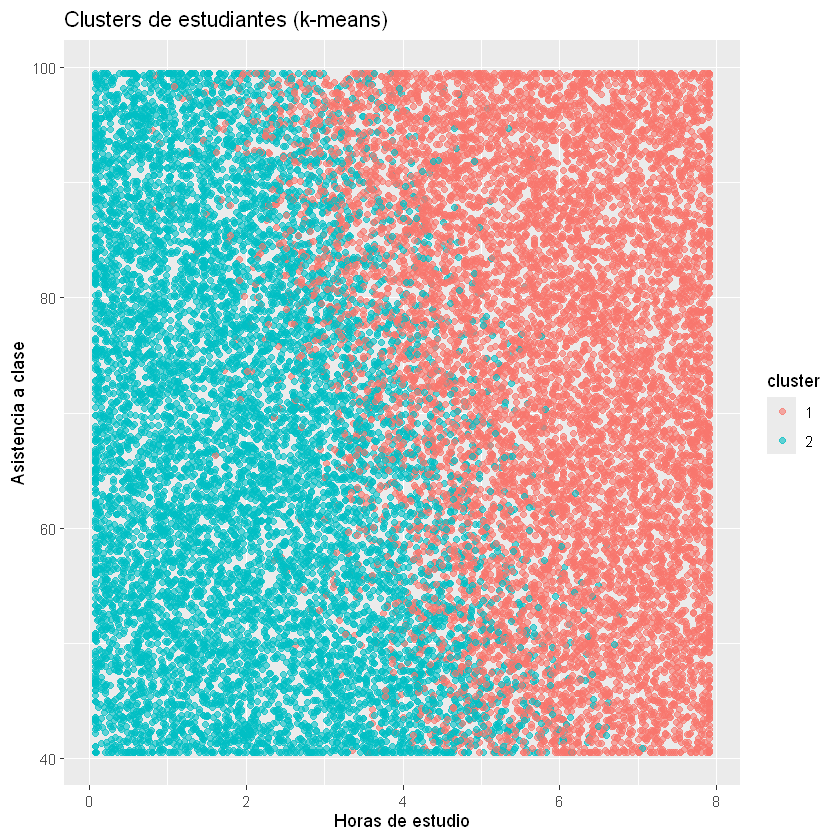

In [78]:
ggplot(df, aes(study_hours, class_attendance, color = cluster)) +
  geom_point(alpha = 0.6) +
  labs(
    title = "Clusters de estudiantes (k-means)",
    x = "Horas de estudio",
    y = "Asistencia a clase"
  )


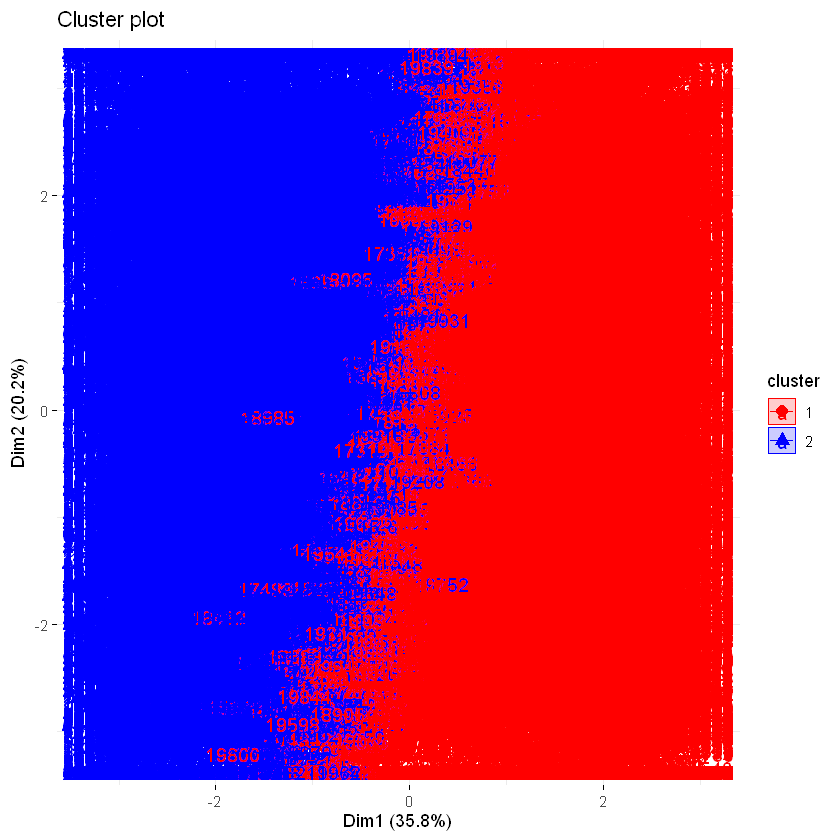

In [95]:
fviz_cluster(
  kmeans_res,
  data = df_escalado,
  palette = c('#FF0000', '#0000FF'),
  ellipse.type = "euclid",
  star.plot = TRUE,
  repel = TRUE,
  ggtheme = theme_minimal()
)


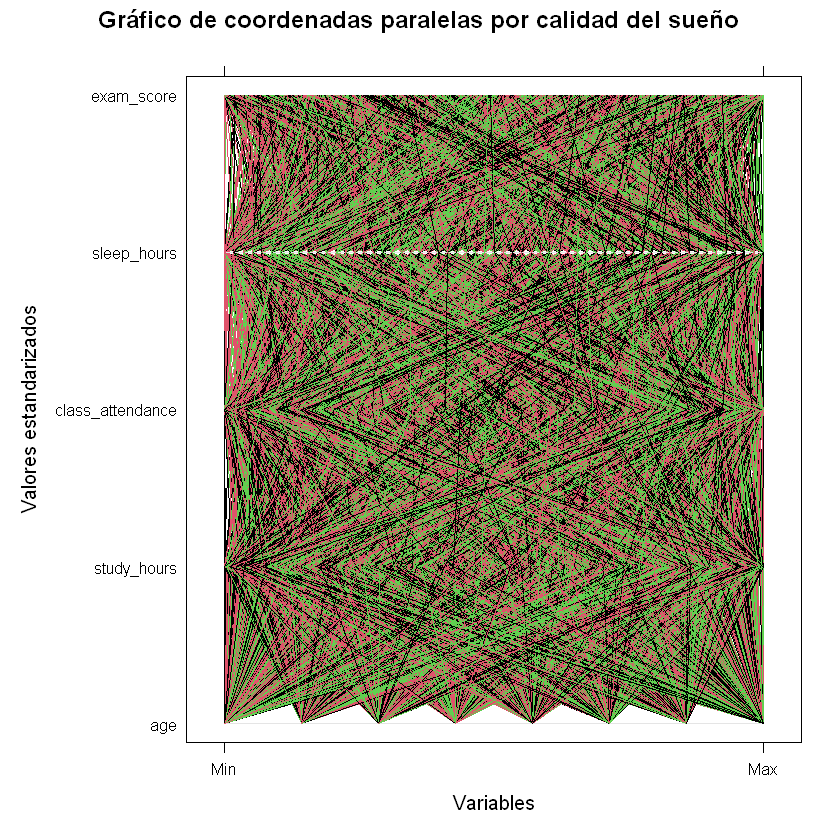

In [94]:
parallelplot(
  ~ df_escalado,
  col = as.numeric(df$gender),
  main = "Gráfico de coordenadas paralelas por calidad del sueño",
  xlab = "Variables",
  ylab = "Valores estandarizados"
)
